Machine Learning Lab : 10

Aim: To build an ANN model for performing classification on a given dataset.

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()
# Convert to float32.

# Flatten images to 1-D vector of 784 features (28*28).
# Normalize images value from [0, 255] to [0, 1].

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients.
#Therefore first we create tensor, then we will create variable
# create feature and targets tensor for test set.
# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)
# Pytorch train and test sets - Tensordataset
# data loader
# visualize one of the images in data set

In [ ]:
# Create ANN Model
class ANNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()
    #########################################
  def forward(self, x):
    ######################################
# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
# Cross Entropy Loss
error = ###########################
# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    # Clear gradients
    ###############################
    # Forward propagation
    # Calculate softmax and cross entropy loss
    # Calculating gradients
    ###################################
    # Update parameters
    ####################################
    count += 1
    if count % 50 == 0:
    # Calculate Accuracy
      correct = 0
      total = 0
      # Predict test dataset
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))
        # Forward propagation
        # Get predictions from the maximum value
        # Total number of labels
        # Total correct predictions
      accuracy = 100 * correct / float(total)
      # store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count % 500 == 0:
    # Print Loss
    print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, loss.data ,accuracy))

In [ ]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()
# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

Lab - 10 :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split

In [5]:
# Load Data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Defining class names
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

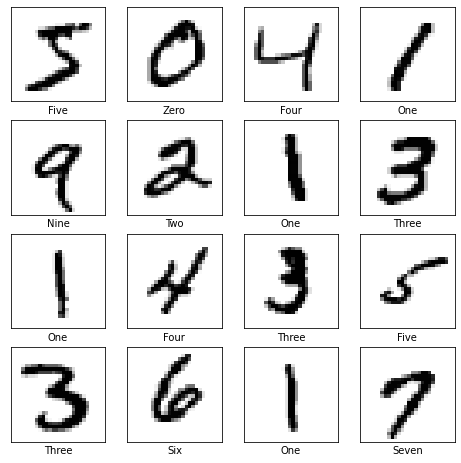

In [10]:
plt.figure(figsize = (8,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

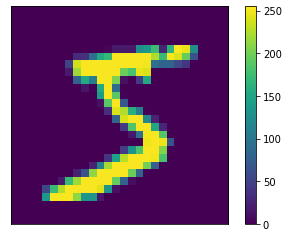

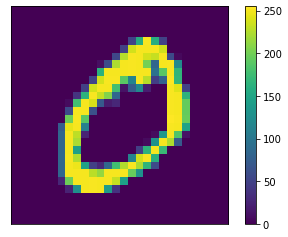

In [13]:
# Ploting diagram
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
# Ploting diagram
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [14]:
model = tensorflow.keras.models.Sequential([
  tensorflow.keras.layers.Flatten(input_shape = (28, 28)),
  tensorflow.keras.layers.Dense(300, activation = 'sigmoid'),
  tensorflow.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print("model : ", model)

model :  <keras.engine.sequential.Sequential object at 0x7f5220b24950>


In [16]:
results = model.fit(train_images, train_labels, epochs = 10, batch_size = 1000)
print("results : ", results)

Epoch 1/10
60/60 [==============================] - 2s 25ms/step - loss: 0.1355 - accuracy: 0.9625
Epoch 2/10
60/60 [==============================] - 2s 25ms/step - loss: 0.1262 - accuracy: 0.9639
Epoch 3/10
60/60 [==============================] - 2s 25ms/step - loss: 0.1261 - accuracy: 0.9644
Epoch 4/10
60/60 [==============================] - 1s 25ms/step - loss: 0.1201 - accuracy: 0.9661
Epoch 5/10
60/60 [==============================] - 2s 25ms/step - loss: 0.1163 - accuracy: 0.9680
Epoch 6/10
60/60 [==============================] - 2s 25ms/step - loss: 0.1131 - accuracy: 0.9680
Epoch 7/10
60/60 [==============================] - 1s 25ms/step - loss: 0.1096 - accuracy: 0.9691
Epoch 8/10
60/60 [==============================] - 1s 25ms/step - loss: 0.1061 - accuracy: 0.9699
Epoch 9/10
17/60 [=======>......................] - ETA: 1s - loss: 0.0989 - accuracy: 0.9727

KeyboardInterrupt: ignored

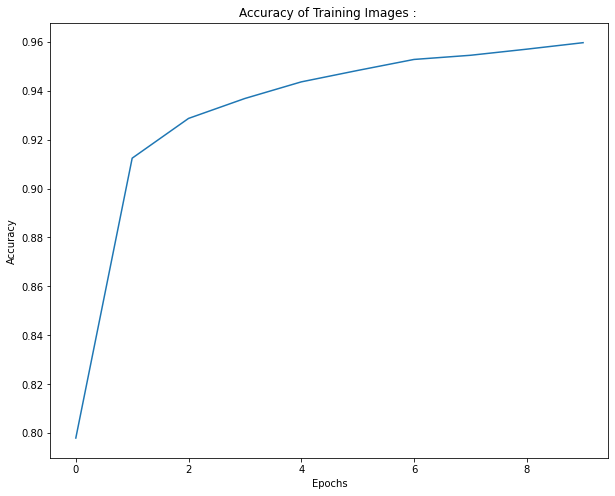

In [17]:
# Plotting Accuracy
plt.figure(figsize = (10, 8))
plt.plot(results.history['accuracy'])
plt.title("Accuracy of Training Images : ")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [18]:
predictions = model.predict(test_images)
print("predictions : ", predictions)

predictions :  [[9.89675391e-06 3.76373828e-06 1.33410096e-04 ... 9.99406219e-01
  3.91605090e-06 1.07550797e-04]
 [3.24358145e-04 1.74207101e-03 9.92530763e-01 ... 1.24220165e-07
  2.35607469e-04 2.76414062e-06]
 [8.13718373e-07 9.99441087e-01 2.18125264e-04 ... 6.23711603e-05
  1.81835538e-04 2.24085329e-06]
 ...
 [1.36895619e-06 7.56279451e-06 5.09004485e-06 ... 1.07344604e-04
  6.34946977e-04 1.13802601e-03]
 [8.35166338e-06 6.98106815e-05 4.57667011e-06 ... 1.03823013e-05
  1.10952863e-02 2.97665360e-06]
 [1.49727348e-04 1.43865309e-05 4.04006365e-04 ... 5.72080398e-06
  5.77636638e-06 2.04122734e-05]]


In [19]:
predicted_labels = np.argmax(predictions, axis = -1)
print("predicted_labels : ", predicted_labels)

predicted_labels :  [7 2 1 ... 4 5 6]


In [21]:
# Calculating accuracy_score
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels, predicted_labels)
print("test_accuracy : ", test_accuracy)

test_accuracy :  0.964
